<a href="https://colab.research.google.com/github/RidhaMoosa/EDSA_Classification_Hackathon/blob/master/Classification_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving training.csv to training (1).csv


In [45]:
import io
train = pd.read_csv(io.BytesIO(uploaded['training.csv']))

KeyError: ignored

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test (1).csv to test (1) (2).csv


In [0]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test (1).csv']))

In [0]:
train_df = train.copy()
test_df = test.copy()

In [0]:
train_df['Hour'] = train_df['TransactionStartTime'].str.slice(start=11,stop=13) 
train_df['Hour'] = train_df['Hour'].astype(int)

train_df['Date'] = train_df['TransactionStartTime'].str.slice(stop=10)
train_df['Date'] = pd.to_datetime(train_df['Date'])


In [128]:
print('No Frauds', round(train_df['FraudResult'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds', round(train_df['FraudResult'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

No Frauds 99.8 % of the dataset
Frauds 0.2 % of the dataset


(0, 23)

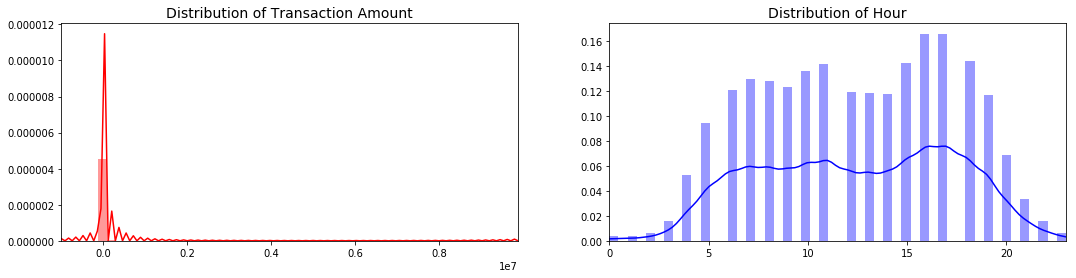

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = train_df['Amount'].values
value_val = train_df['Value'].values
time_val = train_df['Hour'].values
date_val = train_df['Date'].values
ps_val = train_df['PricingStrategy'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Hour', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

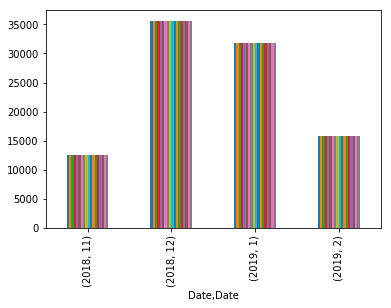

In [135]:
train_df.groupby([train_df['Date'].dt.year, train_df["Date"].dt.month]).count().plot(kind="bar", legend=False)

(0, 4)

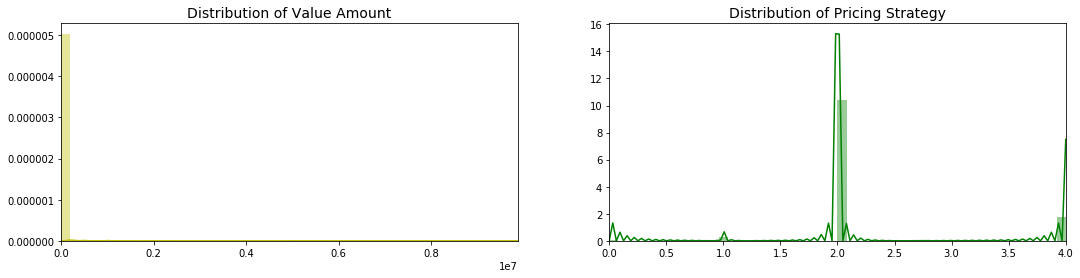

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))


sns.distplot(value_val, ax=ax[0], color='y')
ax[0].set_title('Distribution of Value Amount', fontsize=14)
ax[0].set_xlim([min(value_val), max(value_val)])

sns.distplot(ps_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Pricing Strategy', fontsize=14)
ax[1].set_xlim([min(ps_val), max(ps_val)])

In [137]:
train_df[['Value']].groupby(train_df['ProductCategory'].values).count().sort_values(by='Value',ascending=False)

,Value
financial_services,45405
airtime,45027
utility_bill,1920
data_bundles,1613
tv,1279
ticket,216
movies,175
transport,25
other,2


In [139]:
train.groupby(['CountryCode','FraudResult']).size()

CountryCode  FraudResult
256          0              95469
             1                193
dtype: int64

In [140]:
train_df.groupby(['ProductCategory','FraudResult']).size()

ProductCategory     FraudResult
airtime             0              45009
                    1                 18
data_bundles        0               1613
financial_services  0              45244
                    1                161
movies              0                175
other               0                  2
ticket              0                216
transport           0                 23
                    1                  2
tv                  0               1279
utility_bill        0               1908
                    1                 12
dtype: int64

In [141]:
fraud = train_df1['FraudResult'][train_df1['FraudResult']==1].count()
not_fraud = train_df1['FraudResult'][train_df1['FraudResult']==0].count()

print ("Fraud: " , fraud)
print('Not Fraud: ', not_fraud)

Fraud:  193
Not Fraud:  95469


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std = StandardScaler()
rob = RobustScaler()

train_df['scaled_amount'] = rob.fit_transform(train_df['Amount'].values.reshape(-1,1))



In [0]:
train_df1 = train_df.drop(columns=['TransactionId','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId'])

In [0]:
train_df1 = train_df1[['ProductCategory', 'PricingStrategy', 'scaled_amount', 'FraudResult','Hour']]

In [0]:
train_df1 = train_df1.replace({'ProductCategory' : {'financial_services': 1,
                                                   'utility_bill': 2,
                                                   'airtime': 3,
                                                   'data_bundles': 4,
                                                   'tv': 5,
                                                   'ticket': 6,
                                                   'movies': 7,
                                                   'transport': 3,
                                                    'other': 2}})

In [91]:
train_df1['ProductCategory'].unique()

array([3, 1, 2, 4, 5, 6, 7])

In [0]:
X = train_df1[['scaled_amount','Hour' ,'ProductCategory', 'PricingStrategy']]
y = train_df1[['FraudResult']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [0]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [95]:
from sklearn.model_selection import cross_val_score

log_reg=LogisticRegression(C=0.01)

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.37%


In [0]:
test_df['Hour'] = test_df['TransactionStartTime'].str.slice(start=11,stop=13) 
test_df['Hour'] = test_df['Hour'].astype(int)

std = StandardScaler()
rob = RobustScaler()

test_df['scaled_amount'] = rob.fit_transform(test_df['Amount'].values.reshape(-1,1))


test_df.drop(['Amount'], axis=1, inplace=True)

test_df1 = test_df.drop(columns=['TransactionId','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId'])


test_df1 = test_df1.replace({'ProductCategory' : {'financial_services': 1,
                                                   'utility_bill': 2,
                                                   'airtime': 3,
                                                   'data_bundles': 4,
                                                   'tv': 5,
                                                   'ticket': 6,
                                                   'movies': 7,
                                                   'transport': 8,
                                                    'other': 9,
                                                 'retail': 10}})



In [105]:
test_df1 = test_df1[['scaled_amount', 'Hour', 'ProductCategory', 'PricingStrategy']]
test_df1.head()

,scaled_amount,Hour,ProductCategory,PricingStrategy
0,0.000000,10,3,4
1,0.198020,10,1,2
2,-0.207921,10,1,2
3,0.396040,10,3,4
4,-0.209901,10,1,2


In [132]:
lr_model = LogisticRegression(C=0.01)

lr_model.fit(X_train, y_train)
log_reg_score = cross_val_score(lr_model, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.37%


In [0]:
pred = lr_model.predict(test_df1)

In [0]:
pd.DataFrame(pred).to_csv('Pred4.csv', index=False, header=False)

In [0]:
from google.colab import files
files.download('Pred4.csv')

In [0]:
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_rfr = GridSearchCV(RandomForestClassifier(), tree_params)
grid_rfr.fit(X_train, y_train)

rfr_clf = grid_rfr.best_estimator_

rfr_score = cross_val_score(rfr_clf, X_train, y_train, cv=5)
print('RandomForestClassifier Cross Validation Score', round(rfr_score.mean() * 100, 2).astype(str) + '%')


In [123]:
print(grid_rfr.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


In [124]:
rfr_model = RandomForestClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf= 5)

rfr_model.fit(X_train, y_train)
rfr_score = cross_val_score(rfr_model, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier Cross Validation Score:  93.82%


In [0]:
rfr_pred = rfr_model.predict(test_df1)


In [0]:
pd.DataFrame(pred).to_csv('rfr_Pred.csv', index=False, header=False)
from google.colab import files
files.download('rfr_Pred.csv')